In [36]:
library(limma)
library(reshape2)
library(gridExtra)

source("../../evaluation_utils/plots_eda.R")
source("../../evaluation_utils/simulation_func.R")
# source("../../evaluation_utils/filtering/filtering_normalization.R")


# Settings

Parameters set to generate simulated data with 600 samples and 6000 proteins.

In [37]:
generate_metadata <- function(batch_info, mode){

    if (mode == "balanced"){
        # Create batch assignments for each group
        batches <- rep(c("batch1", "batch2", "batch3"), each = 100)
        # Combine batch assignments
        batch_info$condition <- as.factor(c(rep("A", 300), rep("B", 300)))
        batch_info$batch <- as.factor(c(batches[sample(1:300)], batches[sample(1:300)]))

    } else if (mode == "strong_imbalanced") {
        # Strong imbalance
        # Create batch assignments for each group    
        batches_A <- c(rep("batch1", 32), rep("batch2", 28), rep("batch3", 288))
        batches_B <- c(rep("batch1", 8), rep("batch2", 52), rep("batch3", 192))
        # Combine batch assignments
        batch_info$condition <- as.factor(c(rep("A", length(batches_A)), rep("B", length(batches_B))))
        batch_info$batch <- as.factor(c(
            batches_A[sample(1:length(batches_A))], 
            batches_B[sample(1:length(batches_B))]))
    
    } else if(mode == "mild_imbalanced") {
        # Mild imbalance
        # Create batch assignments for each group    
        batches_A <- c(rep("batch1", 36), rep("batch2", 91), rep("batch3", 185))
        batches_B <- c(rep("batch1", 54), rep("batch2", 49), rep("batch3", 185))
        # Combine batch assignments
        batch_info$condition <- as.factor(c(rep("A", length(batches_A)), rep("B", length(batches_B))))
        batch_info$batch <- as.factor(c(
            batches_A[sample(1:length(batches_A))], 
            batches_B[sample(1:length(batches_B))]))
    }
    return(batch_info)

}

In [38]:
workdir <- "/home/yuliya/repos/cosybio/removeBatch/evaluation_data/simulated/"

number_of_runs = 30

mu_1 = 1.45
mu_4 = 1.25

frac_1 = 0.45
frac_7 = 0.15

# number of samples
m = 600

## generate data

In [39]:
check_dirs <- function(workdir){
    if (!dir.exists(workdir)){
        dir.create(workdir)
    }
}

[1] "/home/yuliya/repos/cosybio/removeBatch/evaluation_data/simulated/balanced/before/intermediate"
[1] "Run simulation for mode: balanced"
[1] "Run number 1"
180 
[1] "Number of DE proteins: 2400\n Number of proteins: 6000\n"
    batch1     batch2     batch3 
 0.5276118 -1.8751505  0.1581926 
   batch1    batch2    batch3 
0.6012622 0.1840636 0.9749039 
[1] "/home/yuliya/repos/cosybio/removeBatch/evaluation_data/simulated/balanced/before/intermediate/1_intensities_data.tsv"
[1] "Run number 2"
180 
[1] "Number of DE proteins: 2400\n Number of proteins: 6000\n"
     batch1      batch2      batch3 
-2.82735662 -0.03727956 -1.42641989 
   batch1    batch2    batch3 
0.3990956 0.5702330 0.4629620 
[1] "/home/yuliya/repos/cosybio/removeBatch/evaluation_data/simulated/balanced/before/intermediate/2_intensities_data.tsv"
[1] "Run number 3"
180 
[1] "Number of DE proteins: 2400\n Number of proteins: 6000\n"
    batch1     batch2     batch3 
-0.2117481  0.7583149 -0.3189229 
    batch1     batc

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”


[1] "Run number 11"
180 
[1] "Number of DE proteins: 2400\n Number of proteins: 6000\n"
    batch1     batch2     batch3 
-0.4676544  3.0232360 -0.3423171 
   batch1    batch2    batch3 
1.4238107 0.3649322 0.4378143 
[1] "/home/yuliya/repos/cosybio/removeBatch/evaluation_data/simulated/balanced/before/intermediate/11_intensities_data.tsv"
[1] "Run number 12"
180 
[1] "Number of DE proteins: 2400\n Number of proteins: 6000\n"
    batch1     batch2     batch3 
-1.9603559  0.5239872  1.5178773 
   batch1    batch2    batch3 
1.3307094 0.5668515 1.1804355 
[1] "/home/yuliya/repos/cosybio/removeBatch/evaluation_data/simulated/balanced/before/intermediate/12_intensities_data.tsv"
[1] "Run number 13"
180 
[1] "Number of DE proteins: 2400\n Number of proteins: 6000\n"
    batch1     batch2     batch3 
 1.8878708 -0.4221288 -1.1311216 
   batch1    batch2    batch3 
0.4395360 0.1619657 1.9760142 
[1] "/home/yuliya/repos/cosybio/removeBatch/evaluation_data/simulated/balanced/before/intermediate

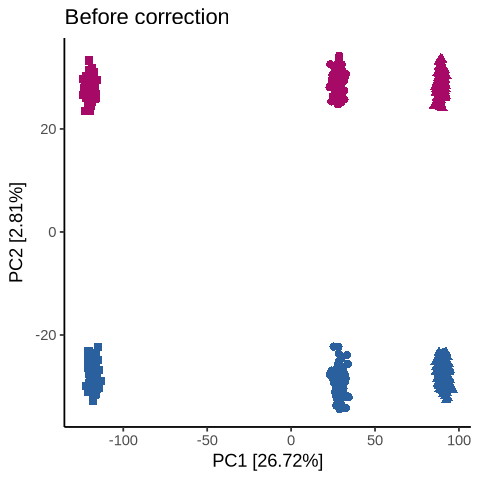

[1] "Run number 21"
180 
[1] "Number of DE proteins: 2400\n Number of proteins: 6000\n"
    batch1     batch2     batch3 
-1.8234035 -0.1264301 -0.2856530 
   batch1    batch2    batch3 
0.4061421 0.7976866 0.5598752 
[1] "/home/yuliya/repos/cosybio/removeBatch/evaluation_data/simulated/balanced/before/intermediate/21_intensities_data.tsv"
[1] "Run number 22"
180 
[1] "Number of DE proteins: 2400\n Number of proteins: 6000\n"
    batch1     batch2     batch3 
-1.7963063  1.1563368  0.6167327 
   batch1    batch2    batch3 
0.1226689 0.3622941 2.2078749 
[1] "/home/yuliya/repos/cosybio/removeBatch/evaluation_data/simulated/balanced/before/intermediate/22_intensities_data.tsv"
[1] "Run number 23"
180 
[1] "Number of DE proteins: 2400\n Number of proteins: 6000\n"
    batch1     batch2     batch3 
-1.0190197  0.4683971 -1.1651004 
     batch1      batch2      batch3 
40.71786879  0.04748001  0.67447478 
[1] "/home/yuliya/repos/cosybio/removeBatch/evaluation_data/simulated/balanced/before/

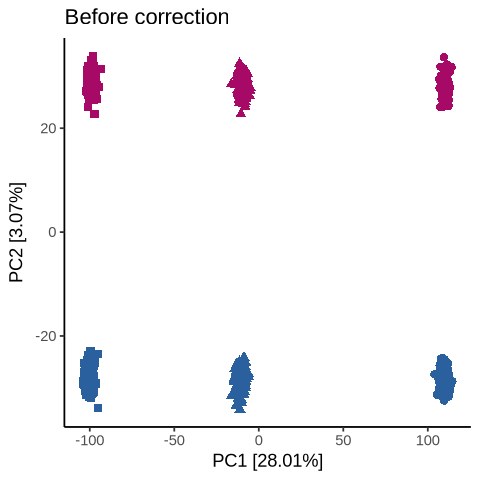

[1] "/home/yuliya/repos/cosybio/removeBatch/evaluation_data/simulated/mild_imbalanced/before/intermediate"
[1] "Run simulation for mode: mild_imbalanced"
[1] "Run number 1"
168 
[1] "Number of DE proteins: 2400\n Number of proteins: 6000\n"
   batch1    batch2    batch3 
-2.335601 -1.519110 -1.061601 
   batch1    batch2    batch3 
0.4985832 0.1287773 0.3828238 
[1] "/home/yuliya/repos/cosybio/removeBatch/evaluation_data/simulated/mild_imbalanced/before/intermediate/1_intensities_data.tsv"
[1] "Run number 2"
168 
[1] "Number of DE proteins: 2400\n Number of proteins: 6000\n"
    batch1     batch2     batch3 
 1.9045272  0.4158074 -1.8385849 
   batch1    batch2    batch3 
0.2306726 0.1577601 0.9751558 
[1] "/home/yuliya/repos/cosybio/removeBatch/evaluation_data/simulated/mild_imbalanced/before/intermediate/2_intensities_data.tsv"
[1] "Run number 3"
168 
[1] "Number of DE proteins: 2400\n Number of proteins: 6000\n"
    batch1     batch2     batch3 
 0.4316043 -0.8748753 -2.2607338 
   

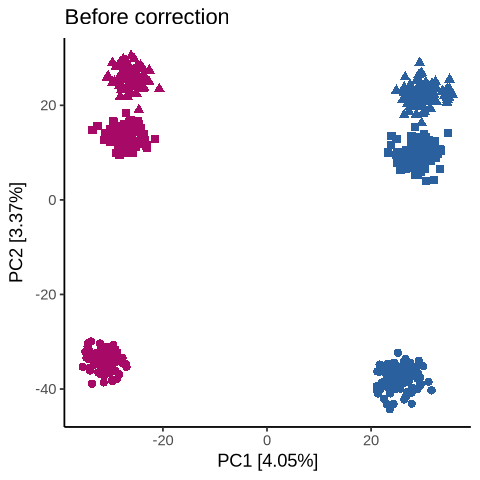

[1] "Run number 11"
168 
[1] "Number of DE proteins: 2400\n Number of proteins: 6000\n"
    batch1     batch2     batch3 
-1.2633970  1.3487554 -0.5041179 
   batch1    batch2    batch3 
0.4387195 0.3360659 0.8153662 
[1] "/home/yuliya/repos/cosybio/removeBatch/evaluation_data/simulated/mild_imbalanced/before/intermediate/11_intensities_data.tsv"
[1] "Run number 12"
168 
[1] "Number of DE proteins: 2400\n Number of proteins: 6000\n"
    batch1     batch2     batch3 
 0.5985214  0.3510759 -0.4092739 
   batch1    batch2    batch3 
5.8866414 0.1453978 0.1226254 
[1] "/home/yuliya/repos/cosybio/removeBatch/evaluation_data/simulated/mild_imbalanced/before/intermediate/12_intensities_data.tsv"
[1] "Run number 13"
168 
[1] "Number of DE proteins: 2400\n Number of proteins: 6000\n"
    batch1     batch2     batch3 
-1.6326342  0.1289234  1.5703951 
   batch1    batch2    batch3 
6.6202155 0.1330311 0.2608992 
[1] "/home/yuliya/repos/cosybio/removeBatch/evaluation_data/simulated/mild_imbalance

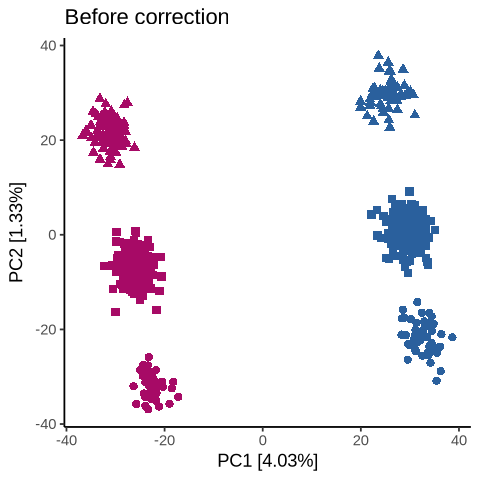

[1] "Run number 21"
168 
[1] "Number of DE proteins: 2400\n Number of proteins: 6000\n"
    batch1     batch2     batch3 
-2.5160404 -0.3082337  1.9990289 
   batch1    batch2    batch3 
0.4021194 0.6272745 0.5315660 
[1] "/home/yuliya/repos/cosybio/removeBatch/evaluation_data/simulated/mild_imbalanced/before/intermediate/21_intensities_data.tsv"
[1] "Run number 22"
168 
[1] "Number of DE proteins: 2400\n Number of proteins: 6000\n"
    batch1     batch2     batch3 
 0.4304705  2.3725763 -0.9295738 
   batch1    batch2    batch3 
0.0593305 0.1558283 2.1618686 
[1] "/home/yuliya/repos/cosybio/removeBatch/evaluation_data/simulated/mild_imbalanced/before/intermediate/22_intensities_data.tsv"
[1] "Run number 23"
168 
[1] "Number of DE proteins: 2400\n Number of proteins: 6000\n"
    batch1     batch2     batch3 
-2.1667595  1.3028956 -0.6250751 
   batch1    batch2    batch3 
0.3501163 0.2632174 0.2765638 
[1] "/home/yuliya/repos/cosybio/removeBatch/evaluation_data/simulated/mild_imbalance

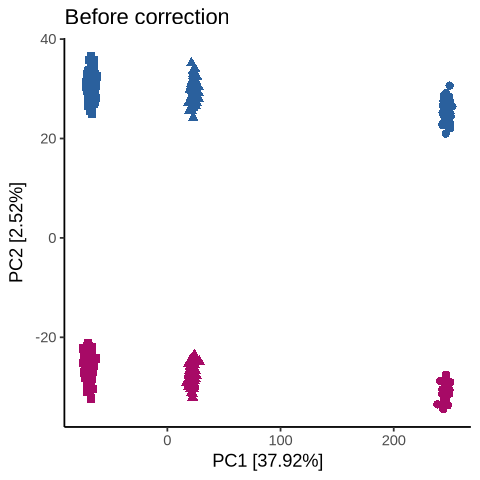

[1] "/home/yuliya/repos/cosybio/removeBatch/evaluation_data/simulated/strong_imbalanced/before/intermediate"
[1] "Run simulation for mode: strong_imbalanced"
[1] "Run number 1"
162 
[1] "Number of DE proteins: 2400\n Number of proteins: 6000\n"
    batch1     batch2     batch3 
 0.7758346  0.2905538 -2.8186645 
   batch1    batch2    batch3 
0.3348570 0.6273743 0.6261668 
[1] "/home/yuliya/repos/cosybio/removeBatch/evaluation_data/simulated/strong_imbalanced/before/intermediate/1_intensities_data.tsv"
[1] "Run number 2"
162 
[1] "Number of DE proteins: 2400\n Number of proteins: 6000\n"
    batch1     batch2     batch3 
-2.5437528 -1.8417219 -0.4380078 
   batch1    batch2    batch3 
0.2678722 1.7944596 0.1718968 
[1] "/home/yuliya/repos/cosybio/removeBatch/evaluation_data/simulated/strong_imbalanced/before/intermediate/2_intensities_data.tsv"
[1] "Run number 3"
162 
[1] "Number of DE proteins: 2400\n Number of proteins: 6000\n"
   batch1    batch2    batch3 
 2.261880 -1.266822  1.645

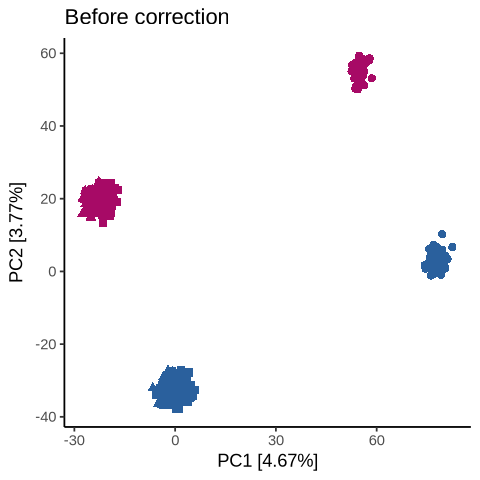

[1] "Run number 11"
162 
[1] "Number of DE proteins: 2400\n Number of proteins: 6000\n"
    batch1     batch2     batch3 
 0.4023496  0.6982618 -1.3818320 
   batch1    batch2    batch3 
0.7155776 1.1484333 0.9660967 
[1] "/home/yuliya/repos/cosybio/removeBatch/evaluation_data/simulated/strong_imbalanced/before/intermediate/11_intensities_data.tsv"
[1] "Run number 12"
162 
[1] "Number of DE proteins: 2400\n Number of proteins: 6000\n"
   batch1    batch2    batch3 
0.5092180 0.0147016 1.3427558 
   batch1    batch2    batch3 
0.4337590 0.2661733 0.6578094 
[1] "/home/yuliya/repos/cosybio/removeBatch/evaluation_data/simulated/strong_imbalanced/before/intermediate/12_intensities_data.tsv"
[1] "Run number 13"
162 
[1] "Number of DE proteins: 2400\n Number of proteins: 6000\n"
     batch1      batch2      batch3 
-0.08588912 -0.76422357 -2.25739485 
    batch1     batch2     batch3 
0.08336827 0.51106884 0.24136504 
[1] "/home/yuliya/repos/cosybio/removeBatch/evaluation_data/simulated/stro

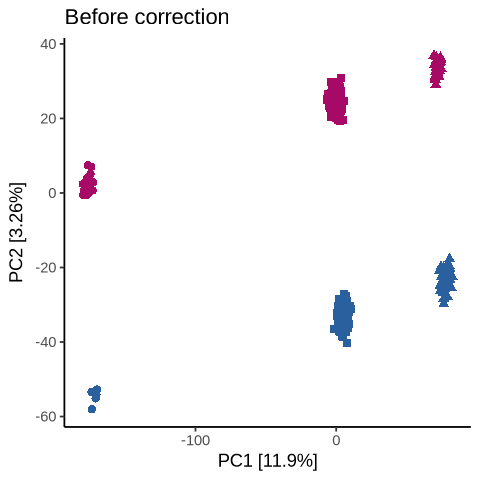

[1] "Run number 21"
162 
[1] "Number of DE proteins: 2400\n Number of proteins: 6000\n"
   batch1    batch2    batch3 
0.1925397 0.4793169 1.0285581 
    batch1     batch2     batch3 
0.07696531 7.89385751 0.10720978 
[1] "/home/yuliya/repos/cosybio/removeBatch/evaluation_data/simulated/strong_imbalanced/before/intermediate/21_intensities_data.tsv"
[1] "Run number 22"
162 
[1] "Number of DE proteins: 2400\n Number of proteins: 6000\n"
    batch1     batch2     batch3 
 1.9385133 -2.0279869  0.4796911 
   batch1    batch2    batch3 
0.5444049 1.3992450 1.1553009 
[1] "/home/yuliya/repos/cosybio/removeBatch/evaluation_data/simulated/strong_imbalanced/before/intermediate/22_intensities_data.tsv"
[1] "Run number 23"
162 
[1] "Number of DE proteins: 2400\n Number of proteins: 6000\n"
   batch1    batch2    batch3 
 1.403506  0.506975 -1.465300 
   batch1    batch2    batch3 
0.3908100 0.3693754 0.3731085 
[1] "/home/yuliya/repos/cosybio/removeBatch/evaluation_data/simulated/strong_imbalance

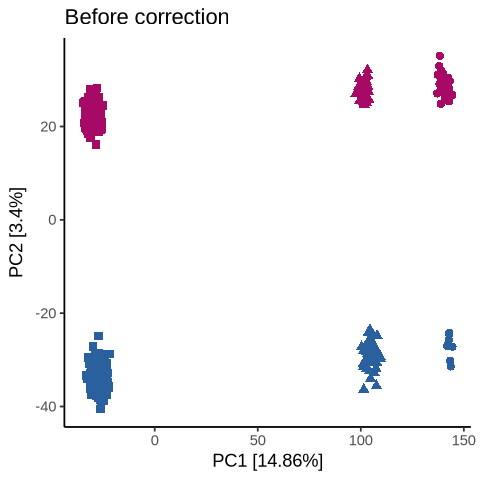

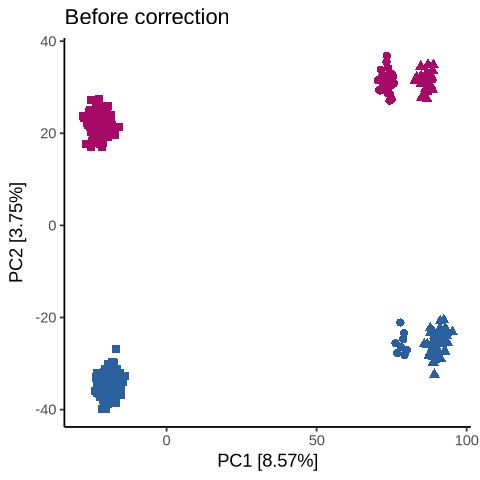

In [40]:
for (mode in c("balanced",
        "mild_imbalanced", 
        "strong_imbalanced"
    )){

    # select random seed
    set.seed(runif(1, 1, 10000))
    sub_path = mode

    # Set directories
    generated_data_directory <- paste0(workdir, sub_path, "/before/intermediate")
    print(generated_data_directory)
    check_dirs(generated_data_directory)

    # Create metadata
    batch_info <- data.frame(file = paste("s", 1:600, sep="."))
    rownames(batch_info) <- batch_info$file
    batch_info <- generate_metadata(batch_info, mode)
    # batch_info %>% group_by(batch, condition) %>%
    #     summarise(n = n()) %>% print()
    
    # Set parameters for simulation
    col_frac_A = length(batch_info[batch_info$condition == "A",]$file) / 600
    col_frac_B = length(batch_info[batch_info$condition == "B",]$file) / 600
    # cat(col_frac_A, "\n")
    # cat(col_frac_B)


    print(paste0("Run simulation for mode: ", mode))
    # Run simulation
    for(j in 1:number_of_runs){
        print(paste0("Run number ", j))
        set.seed(runif(1, 1, 10000))

        result <- generate_data(
            col_frac_A, col_frac_B,
            frac_1, frac_7,
            mu_1=mu_1, mu_4=mu_4,
            batch_info=batch_info,
            mode_version = mode,
            m = m
        ) %>% as.data.frame()
        
        number_DE <- frac_1*2500*2 + frac_7*1000

        rownames(result) <- c(paste0("prt", 1:length(rownames(result))))
        dim(result)
        print(paste0("Number of DE proteins: ", number_DE, "\n", " Number of proteins: ", nrow(result), "\n"))

        # second, add batch effects
        data_with_batch_effects <- add_batch_effect(result, batch_info)

        # Add missing values
        # data_with_batch_effects_missing <- simulateMissingValues(data_with_batch_effects, alpha = 0.2, beta = 0.5)
        # sum(is.na(data_with_batch_effects_missing)) / (nrow(data_with_batch_effects_missing) * ncol(data_with_batch_effects_missing))
        data_with_batch_effects_missing <- data_with_batch_effects

        print(paste0(generated_data_directory, "/", j, "_intensities_data.tsv"))
        # save data without missing values as one file
        data_with_batch_effects %>% rownames_to_column("rowname") %>%
            write.table(paste0(generated_data_directory, "/", j, "_intensities_data.tsv"), sep = "\t", row.names = FALSE)
        # and data with them as one file
        # write.table(data_with_batch_effects_missing, paste0(generated_data_directory, "/", j, "_intensities_data_missing.tsv"), sep = "\t")
        # and data without batch effects as one file
        result %>% rownames_to_column("rowname") %>%
            write.table(paste0(generated_data_directory, "/", j, "_intensities_data_no_batch.tsv"), sep = "\t", row.names = FALSE)

        if(j %% 10 == 0){
            print(paste0("Run number ", j))
            options(repr.plot.width=4, repr.plot.height=4)
            plot <- pca_plot(
                data_with_batch_effects_missing, batch_info,
                title = paste("Before correction"),
                quantitative_col_name = "file", 
                col_col = "condition", shape_col="batch", show_legend=F, cbPalette=c("#a70a66", "#2a609d"))
            print(plot)
        }

    }
    batch_info$lab <- mutate(batch_info, 
        lab =ifelse(batch == "batch1", "lab1", 
            ifelse(batch == "batch2", "lab2", "lab3")))$lab
    batch_info$batch <- NULL
    # write batch info
    write.table(batch_info, paste0(workdir, "/", mode, "/all_metadata.tsv"), sep = "\t")
}